In [178]:
import numpy as np


C0 = [[6, 7, 2, 2],
     [6.5, 8, 1, 3],
     [7, 9, 6, 2],
     [7.5, 10, 7, 1],
     [8, 5, 3, 1]
     ]
T0 = [
    [6, 3, 2, 9],
     [6.5, 6, 5, 10],
     [7, 7, 6, 11],
     [7.5, 8, 7, 12],
     [8, 9, 8, 5]
]
Tz0 = 26

def rebase_matrix(C, T):
  """1-е преобразование матрицы"""
  for i in range(len(C)):
    Cr_min = min(C[i])
    Tr = T[i][C[i].index(Cr_min)]
    for j in range(len(C[i])):
      if C[i][j] > Cr_min and T[i][j] > Tr:
        C[i][j] = '-'
        T[i][j] = '-'
  return C, T

def minimum(l):
  """Поиск минимума при условии, что у нас глупые черточки
  l - список"""
  str_l = str(l)
  str_l = str_l.replace("'-',", '')
  str_l = str_l.replace("'-'", '')
  new_list = eval(str_l)
  return min(new_list)



def second_rebase(C, T, Tz):
  """Преобразование, вычеркивая нарушения ограничения по времени, по формуле при Tз = 26"""
  for i in range(len(T)):
    for j in range(len(T[i])):
      summ = 0
      if T[i][j] != "-":
        summ += T[i][j]
        for r in range(len(T)):
          if r != i:
            summ += minimum(list(T[r]))
      if summ > Tz:   # сумма не должна быть больше заданного времени
        T[i][j] = '-'
        C[i][j] = '-'
  return C, T


def decision_tree(C, T):
  """Построение дерева решений
  Складываются элемент из строки и минимальные элементы всех остальных строк
  Входные данные:
  C - матрица "стоимости"
  T - матрица "времени"
  """
  dec_tree = list()
  for i in range(len(C)):
    temp_tree = list()  # один слой дерева
    for j in range(len(C[i])):
      Csumm = 0; Tsumm = 0
      if C[i][j] == '-':  # если элемента нет, то соответсвенно пропускаем
        continue
      Csumm = C[i][j]; Tsumm = T[i][j]
      for r in range(len(C)):
        if r != i:
          Csumm += minimum(C[r]); Tsumm += minimum(T[r])
      temp_tree.append([Csumm, Tsumm])
    dec_tree.append(temp_tree)
  return dec_tree



C1, T1 = rebase_matrix(C0, T0)  # матрицы после первого преобразования
print(C1)
print(T1)
C2, T2 = second_rebase(C1, T1, Tz0) # матрицы после второго преобразования
dec_tree = decision_tree(C2, T2)

print("Преобразованная матрица C:")
for i in range(len(C2)):
  print(C2[i])

print()

print("Преобразованная матрица T:")
for i in range(len(T2)):
  print(T2[i])

print("Дерево решений:")
for decision in dec_tree:
  print(str(decision).center(40))

[['-', '-', 2, 2], ['-', '-', 1, '-'], [7, 9, 6, 2], [7.5, 10, 7, 1], ['-', '-', '-', 1]]
[['-', '-', 2, 9], ['-', '-', 5, '-'], [7, 7, 6, 11], [7.5, 8, 7, 12], ['-', '-', '-', 5]]
Преобразованная матрица C:
['-', '-', 2, '-']
['-', '-', 1, '-']
[7, 9, 6, '-']
[7.5, 10, 7, '-']
['-', '-', '-', 1]

Преобразованная матрица T:
['-', '-', 2, '-']
['-', '-', 5, '-']
[7, 7, 6, '-']
[7.5, 8, 7, '-']
['-', '-', '-', 5]
Дерево решений:
               [[17, 25]]               
               [[17, 25]]               
     [[18, 26], [20, 26], [17, 25]]     
   [[17.5, 25.5], [20, 26], [17, 25]]   
               [[17, 25]]               


In [29]:
import networkx as nx
graph = nx.Graph()

dec = {'A': 0, 'B': 1, 'C': 4}

graph = nx.Graph()
kilometres = {('A', 'B', 15),
              ('B', 'C', 1)}
#graph.add_weighted_edges_from(kilometres)
graph.add_nodes_from(dec)


nx.draw_circular(graph,
         node_color='red',
         node_size=1000,
         with_labels=True)

Дерево решений:
               [[17, 25]]               
               [[17, 25]]               
     [[18, 26], [20, 26], [17, 25]]     
   [[17.5, 25.5], [20, 26], [17, 25]]   
               [[17, 25]]               
-1 <class 'int'>
-1 <class 'int'>
-3 <class 'int'>
-1 <class 'int'>
1 <class 'int'>
-3 <class 'int'>
-1 <class 'int'>
1 <class 'int'>
-1 <class 'int'>


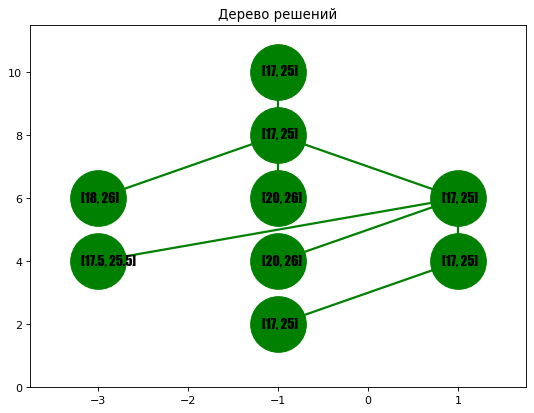

In [177]:
import matplotlib.pyplot as plt
print("Дерево решений:")
for decision in dec_tree:
  print(str(decision).center(40))

fig, ax = plt.subplots(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Дерево решений")

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

font = {'family': 'fantasy',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }
optimal = []
for i in range(len(dec_tree)):
    optimal.append(dec_tree[i][0])
    for j in range(len(dec_tree[i])):
        if sum(optimal[i]) > sum(dec_tree[i][j]): optimal[i] = dec_tree[i][j]

len_tree = len(dec_tree)
opt_coord_line = []; coord_line_end = []
left_x = right_x = 0
for i, y in zip(range(len_tree), range(2*len_tree, 0, -2)):     # рисуем точки и записываем координаты для линий между ними
    len_layer = len(dec_tree[i])
    coord_line_end.append([])
    for j, x in zip(range(len_layer), range(-len_layer, len_layer+1, 2)):
        if optimal[i] == dec_tree[i][j]:
            opt_coord_line.append([x, y])
        if len_layer % 2 == 0 and x == 0: continue
        plt.scatter(x, y, color='green', s=2500, marker='o')
        print(x, type(x))
        if left_x > x: left_x = x
        if right_x < x: right_x = x
        coord_line_end[i].append([x,y])
        plt.text(x-0.18, y-0.1, dec_tree[i][j], fontdict=font)

for i in range(len_tree-1): # рисуем линии
    for j in range(len(coord_line_end[i+1])):
        x1, y1, x2, y2 =  opt_coord_line[i] + coord_line_end[i+1][j]
        ax.plot([x1, x2], [y1, y2], linestyle = '-', linewidth = 2, color="green")

plt.xlim(left_x-0.75, right_x+0.75)
plt.ylim(0, 2*len_tree+1.5)

plt.savefig("decision_tree.png")
